In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import sympy

## Señal EMG

In [2]:
#Lectura de los datos guardados en txt
raw_signal = np.genfromtxt("daniel-brazo.txt", delimiter="\t")
señalsinprocesar = raw_signal[:,-2]
señalemg = raw_signal[:,-2]
print("Señal obtenida:",señalemg)

Señal obtenida: [458. 560. 489. ... 514. 504. 506.]


In [3]:
Fs=1000; #Frecuencia de muestreo
Ts=1/Fs
señalemg=señalemg[0:19953]
M = len(señalemg)
n = np.arange(0,M)
t = n/Fs

In [4]:
def spectral_analysis(input,Fs): 
    N= len(input)
    F_input = np.fft.fft(input,N)
    F_input = F_input[0:N//2]
    Magnitude_F_input = np.abs(F_input)
    F = np.linspace(0,Fs/2,N//2)
    plt.plot(F, Magnitude_F_input)
    plt.grid(linestyle=":")
    plt.title("Analisis espectral de la señal")
    plt.xlabel("Frecuencias (hz)")
    plt.ylabel("FFT (db)")
    plt.xlim([0,500])
    plt.ylim([0,0.125*1e6])
    plt.show()

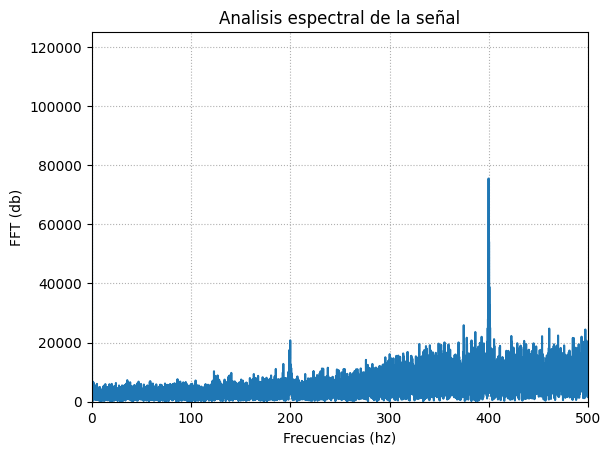

In [5]:
spectral_analysis(señalemg,Fs)

## Diseño del filtro IIR pasa bajo 

In [6]:
wp=2*np.pi*40
ws=2*np.pi*70
N_ord, Wc= signal.buttord(wp, ws, gpass=3, gstop=40, analog=True) #gpass=loss in passband edge frecuencies, gstop= attenuation in stopband edge frecuencies 
fc = np.round(Wc/(2*np.pi) ,2) 
print(f"Orden del filtro: {N_ord}")
print(f"Frecuencia de corte calculada: {fc} hz")

Orden del filtro: 9
Frecuencia de corte calculada: 40.01 hz


In [7]:
# Funcion de transferencia del filtro pasa bajo analogico
b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')
print(b,a)

[4.01042092e+21] [1.00000000e+00 1.44771879e+03 1.04794484e+06 4.95117954e+08
 1.67697369e+11 4.21580670e+13 7.86632697e+15 1.05222986e+18
 9.18682170e+19 4.01042092e+21]


Text(0, 0.5, 'Magnitud (db)')

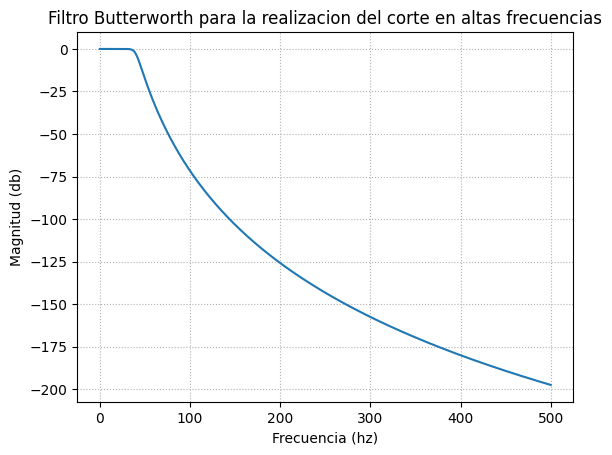

In [8]:
# Respuesta en frecuencia del filtro analogico
Fmax=500
F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  #Angular frecuences
W_freqs, H = signal.freqs(b,a,W_freqs)
Hm=np.abs(H)
plt.plot(F_freqs, 20 * np.log10(Hm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.title("Filtro Butterworth para la realizacion del corte en altas frecuencias")
plt.ylabel("Magnitud (db)")

## Transformada bilineal de H(s) a H(z)

Text(0, 0.5, 'Magnitud (db)')

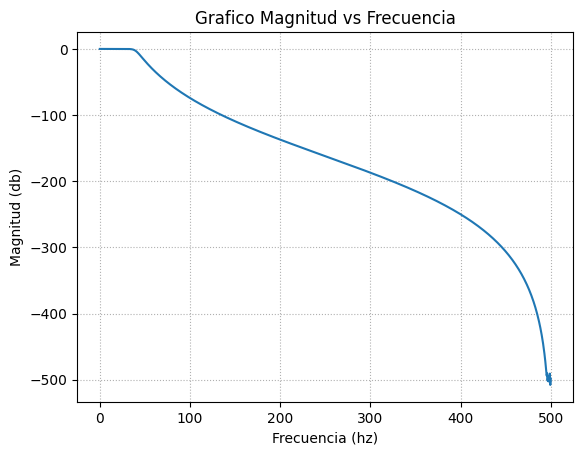

In [9]:
bd, ad = signal.bilinear(b,a,Fs)

Wz, Hd = signal.freqz(bd, ad, W_freqs/Fs)

Hdm = np.abs(Hd)
plt.plot(F_freqs, 20 * np.log10(Hdm))
plt.grid(linestyle=":")
plt.title("Grafico Magnitud vs Frecuencia")
plt.xlabel("Frecuencia (hz)")
plt.ylabel("Magnitud (db)")

## Filtrado

In [10]:
def filtroIIR(bd,ba,señal,Fs):
    y = signal.lfilter(bd,ad, señal)
    N=len(señal)
    Yf = np.fft.fft(y,N)
    Yf = Yf[:N//2]
    Ym = np.abs(Yf)
    Fd = np.linspace(0, Fs//2, N//2)
    plt.plot(Fd, Ym)
    plt.grid(linestyle=":")
    plt.xlim([0,500])
    plt.ylim([0,0.125*1e6])
    return y
    

Text(0.5, 1.0, 'Analisis de frecuencia realizado el corte')

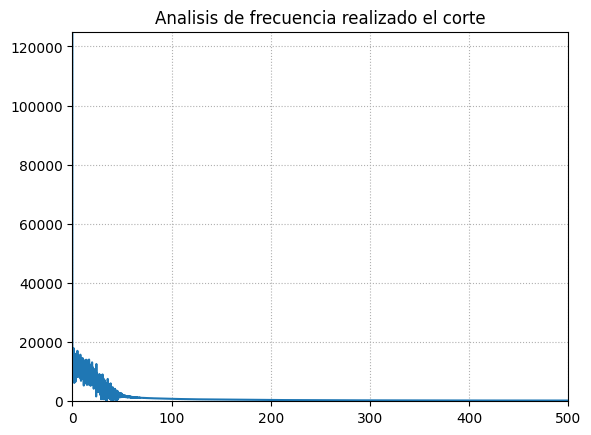

In [11]:
señalemgfiltrada=filtroIIR(bd,ad,señalemg,Fs)
plt.title("Analisis de frecuencia realizado el corte")

Text(0.5, 1.0, ' Señal EMG de biceps flexionando sin el corte')

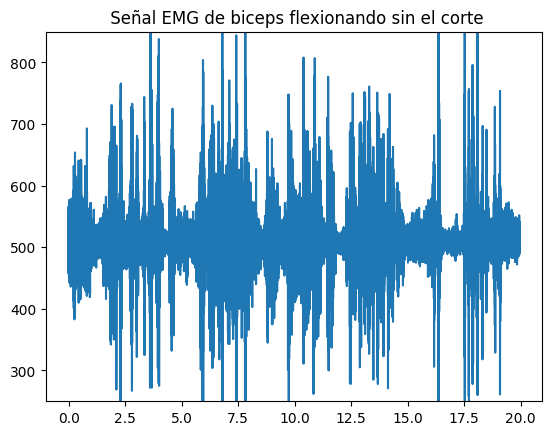

In [12]:
plt.plot(t,señalsinprocesar)
plt.ylim([250,850])
plt.title(" Señal EMG de biceps flexionando sin el corte")    

Text(0.5, 1.0, ' Señal EMG de biceps flexionando una vez realizado el corte')

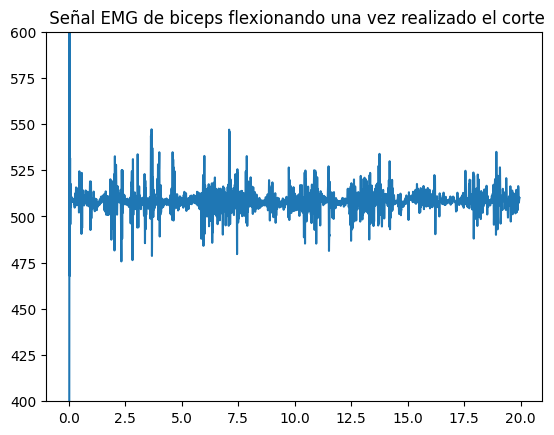

In [13]:
plt.plot(t,señalemgfiltrada)
plt.ylim([400,600])
plt.title(" Señal EMG de biceps flexionando una vez realizado el corte")    

## Señal ECG

In [14]:
raw_signal_ECG = np.genfromtxt("./ecg_daniel1.txt",skip_header = 3, usecols=(0,5))
señalecgsinprocesar = raw_signal_ECG[:,-1]
señalecg = raw_signal_ECG[:,-1]
print("Señal obtenida:",señalecg)

Señal obtenida: [506. 509. 514. ... 465. 460. 455.]


In [15]:
Fs=1000; #Frecuencia de muestreo
Ts=1/Fs
señalecg=señalecg[0:137853]
M = len(señalecg)
n = np.arange(0,M)
t = n/Fs

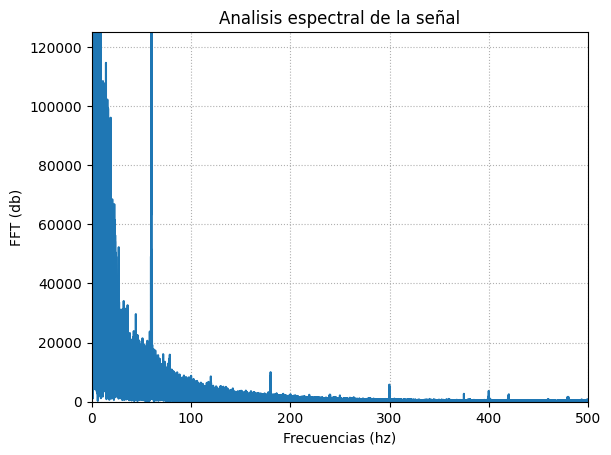

In [16]:
spectral_analysis(señalecg,Fs)

## Diseño del filtro IIR pasa bajo

In [17]:
wp=2*np.pi*86
ws=2*np.pi*157
N_ord, Wc= signal.buttord(wp, ws, gpass=5, gstop=30, analog=True) #gpass=loss in passband edge frecuencies, gstop= attenuation in stopband edge frecuencies 
fc = np.round(Wc/(2*np.pi) ,2) 
print(f"Orden del filtro: {N_ord}")
print(f"Frecuencia de corte calculada: {fc} hz")

Orden del filtro: 6
Frecuencia de corte calculada: 80.65 hz


In [18]:
# Funcion de transferencia del filtro pasa bajo analogico
b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')
print(b,a)

[1.69283327e+16] [1.00000000e+00 1.95782018e+03 1.91652993e+06 1.18940639e+09
 4.92100343e+11 1.29077018e+14 1.69283327e+16]


Text(0, 0.5, 'Magnitud (db)')

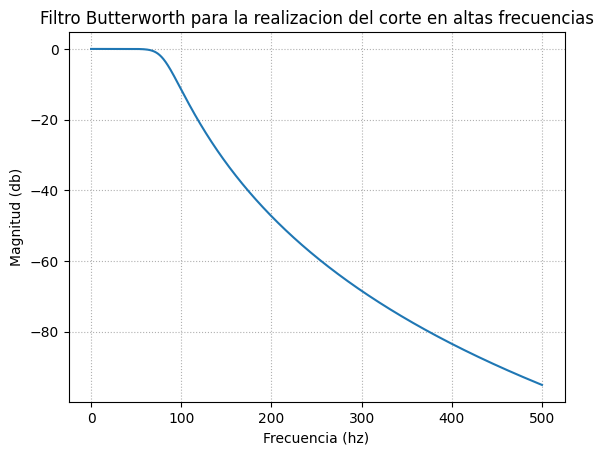

In [19]:
# Respuesta en frecuencia del filtro analogico
Fmax=500
F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  #Angular frecuences
W_freqs, H = signal.freqs(b,a,W_freqs)
Hm=np.abs(H)
plt.plot(F_freqs, 20 * np.log10(Hm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.title("Filtro Butterworth para la realizacion del corte en altas frecuencias")
plt.ylabel("Magnitud (db)")

## Transformada bilineal

Text(0, 0.5, 'Magnitud (db)')

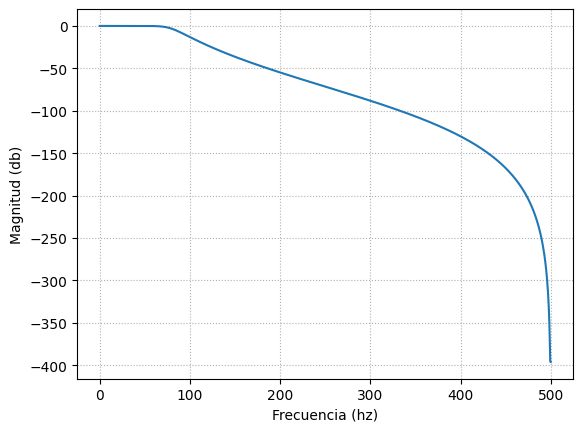

In [20]:
bd, ad = signal.bilinear(b,a,Fs)

Wz, Hd = signal.freqz(bd, ad, W_freqs/Fs)

Hdm = np.abs(Hd)
plt.plot(F_freqs, 20 * np.log10(Hdm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.ylabel("Magnitud (db)")

## Filtrado

Text(0.5, 1.0, 'Analisis de frecuencia realizado el corte')

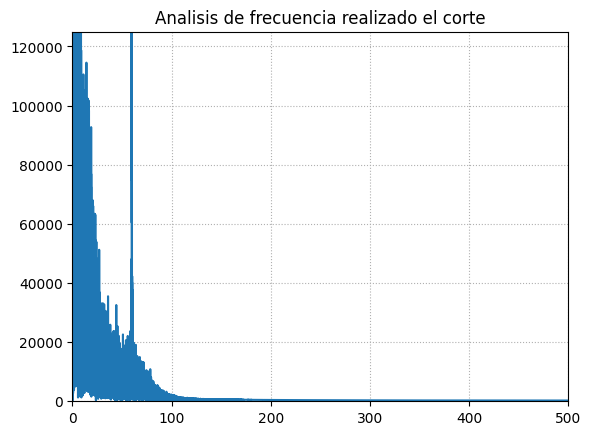

In [21]:
señalecgfiltrada=filtroIIR(bd,ad,señalecg,Fs)
plt.title("Analisis de frecuencia realizado el corte")

Text(0.5, 1.0, ' Señal ECG sin realizar corte')

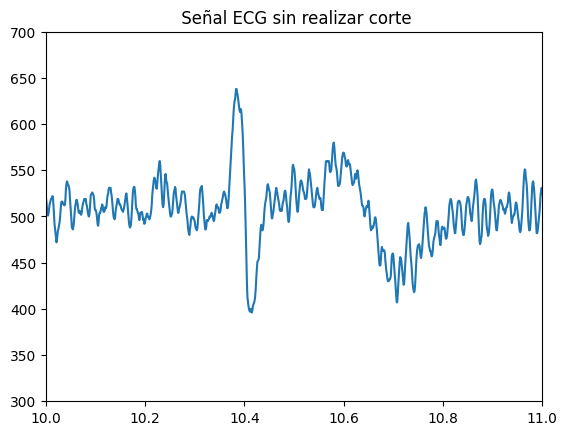

In [22]:
plt.plot(t,señalecgsinprocesar)
plt.xlim([10,11])
plt.ylim([300,700])
plt.title(" Señal ECG sin realizar corte")    

Text(0.5, 1.0, ' Señal ECG una vez realizado el corte')

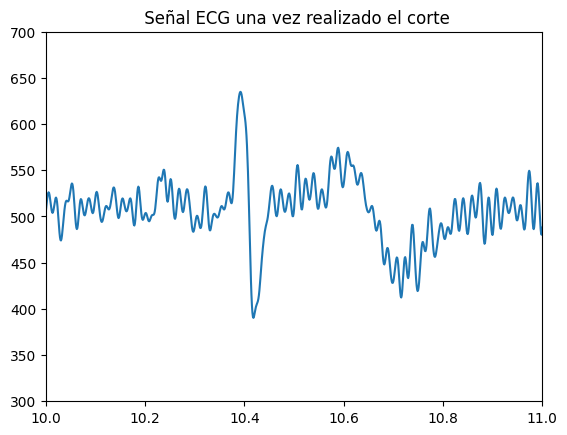

In [23]:
plt.plot(t,señalecgfiltrada)
plt.xlim([10,11])
plt.ylim([300,700])
plt.title(" Señal ECG una vez realizado el corte")    

## Señal EEG

In [24]:
raw_signal_EEG = np.genfromtxt("./ejerc_3.txt",skip_header = 3, usecols=(0,5))
señaleegsinprocesar = raw_signal_EEG[:,-1]
señaleeg = raw_signal_EEG[:,-1]
print("Señal obtenida:",señaleeg)

Señal obtenida: [377. 505. 336. ...   5.   0.  46.]


In [25]:
Fs=1000; #Frecuencia de muestreo
Ts=1/Fs
señaleeg=señaleeg[0:22488]
M = len(señaleeg)
n = np.arange(0,M)
t = n/Fs

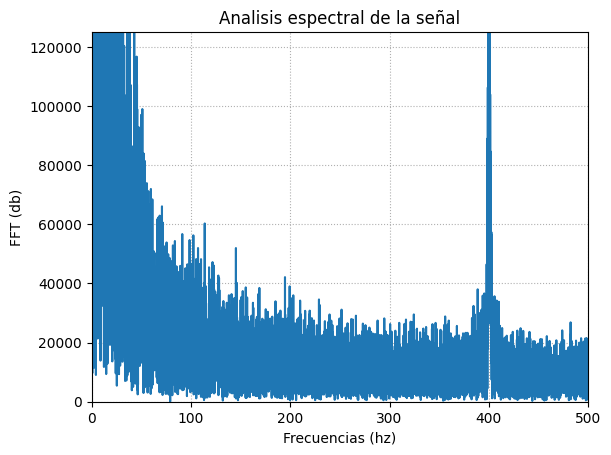

In [26]:
spectral_analysis(señaleeg,Fs)

In [27]:
wp=2*np.pi*14.2857
ws=2*np.pi*5
N_ord, Wc= signal.buttord(wp, ws, gpass=3, gstop=40, analog=True) #gpass=loss in passband edge frecuencies, gstop= attenuation in stopband edge frecuencies 
fc = np.round(Wc/(2*np.pi) ,2) 
print(f"Orden del filtro: {N_ord}")
print(f"Frecuencia de corte calculada: {fc} hz")

Orden del filtro: 5
Frecuencia de corte calculada: 14.28 hz


In [28]:
# Funcion de transferencia del filtro pasa bajo analogico
b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')
print(b,a)

[5.81267111e+09] [1.00000000e+00 2.90330583e+02 4.21459237e+04 3.78120938e+06
 2.09661282e+08 5.81267111e+09]


Text(0, 0.5, 'Magnitud (db)')

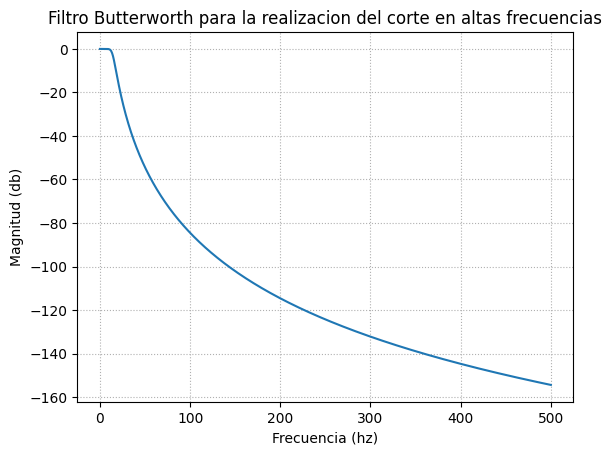

In [29]:
# Respuesta en frecuencia del filtro analogico
Fmax=500
F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  #Angular frecuences
W_freqs, H = signal.freqs(b,a,W_freqs)
Hm=np.abs(H)
plt.plot(F_freqs, 20 * np.log10(Hm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.title("Filtro Butterworth para la realizacion del corte en altas frecuencias")
plt.ylabel("Magnitud (db)")

## Transformada bilineal

Text(0, 0.5, 'Magnitud (db)')

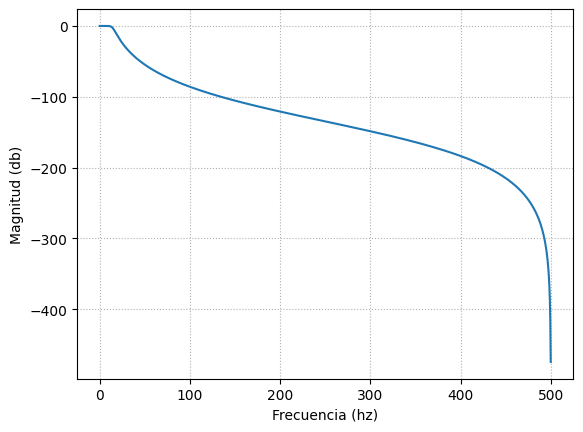

In [30]:
bd, ad = signal.bilinear(b,a,Fs)

Wz, Hd = signal.freqz(bd, ad, W_freqs/Fs)

Hdm = np.abs(Hd)
plt.plot(F_freqs, 20 * np.log10(Hdm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.ylabel("Magnitud (db)")

## Filtrado

Text(0.5, 1.0, 'Analisis de frecuencia realizado el corte')

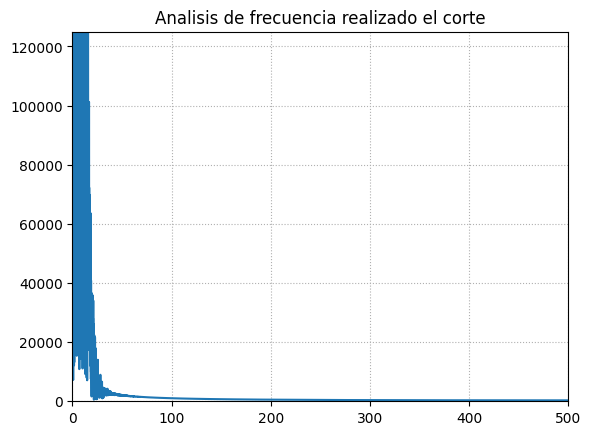

In [31]:
señaleegfiltrada=filtroIIR(bd,ad,señaleeg,Fs)
plt.title("Analisis de frecuencia realizado el corte")

Text(0.5, 1.0, ' Señal EEG sin realizar corte')

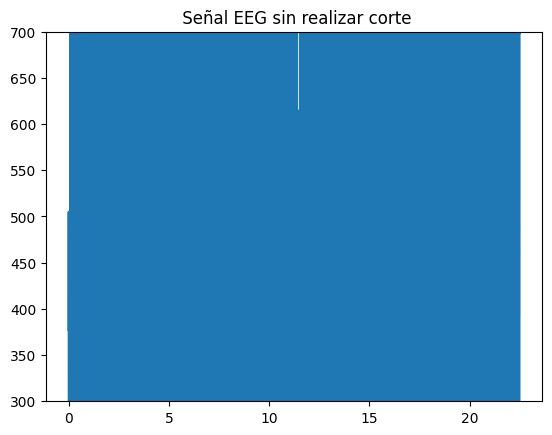

In [32]:
plt.plot(t,señaleegsinprocesar)
plt.ylim([300,700])
plt.title(" Señal EEG sin realizar corte")    

Text(0.5, 1.0, ' Señal EEG una vez realizado el corte')

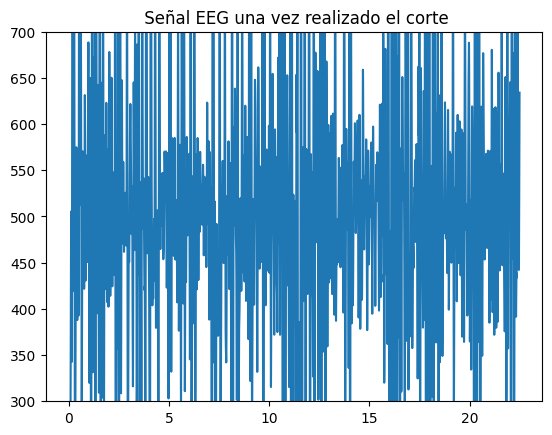

In [33]:
plt.plot(t,señaleegfiltrada)
plt.ylim([300,700])
plt.title(" Señal EEG una vez realizado el corte")    